### Import libraries

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import PyPDF2
import pandas as pd

### Download required data

In [4]:
# Download required NLTK data
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('vader_lexicon')

### Customize

In [5]:
#name of the pdf file you want to analyse
myfile='0502 prime-mmfs-onset-pandemic.pdf'

#name of the file to save sentiment score in CSV format
my_feedback='0502 pdf_feedback_with_sentiment.csv'

### Read and extract text from pdf

In [6]:
# Read text from PDF file
def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in range(len(reader.pages)):
            text += reader.pages[page].extract_text()
    return text

# Extract text from PDF
pdf_text = read_pdf(myfile)

### Preprocess and split text

In [7]:
# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_text)

# Split text into sentences for sentiment analysis
sentences = pdf_text.split('\n')
cleaned_sentences = [preprocess_text(sentence) for sentence in sentences]

### Sentiment analysis with VADER and TextBlob

In [8]:
# VADER sentiment analysis
sia = SentimentIntensityAnalyzer()
vader_sentiments = [sia.polarity_scores(sentence)['compound'] for sentence in cleaned_sentences]

# TextBlob sentiment analysis
textblob_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in cleaned_sentences]

### Create a dataframe and display negative sentiments

In [9]:
# Create a DataFrame with the text and sentiment scores
data = pd.DataFrame({
    'text_column': sentences,
    'vader_sentiment': vader_sentiments,
    'textblob_sentiment': textblob_sentiments
})

# Identify negative feedback (based on VADER sentiment score)
negative_feedback = data[data['vader_sentiment'] < -0.5]
print(negative_feedback[['text_column', 'vader_sentiment']])

                                           text_column  vader_sentiment
202  lowest WLA of 27% was reached by one prime ins...          -0.5267


### Plot VADER and TextBlob sentiment scores

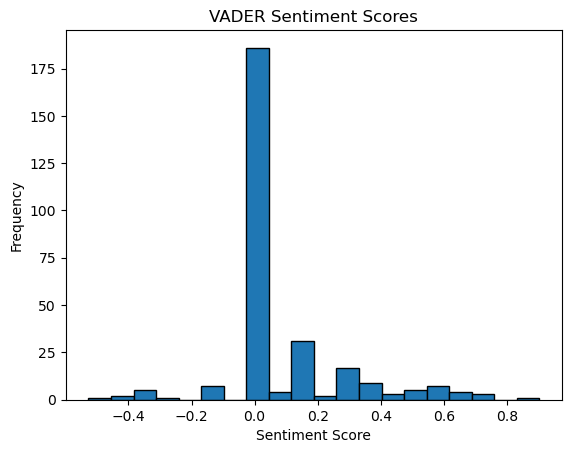

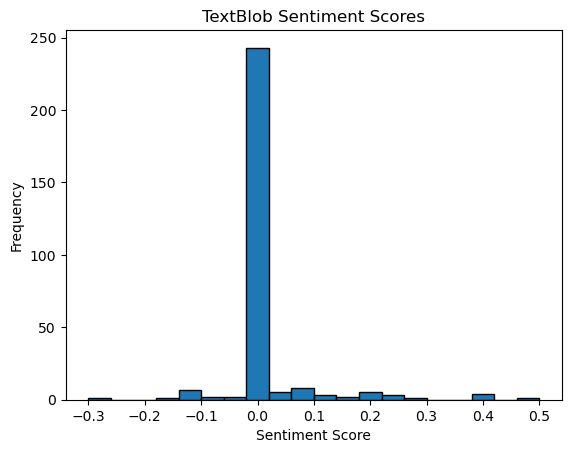

In [10]:
# Plot VADER sentiment scores
plt.hist(data['vader_sentiment'], bins=20, edgecolor='black')
plt.title('VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plot TextBlob sentiment scores
plt.hist(data['textblob_sentiment'], bins=20, edgecolor='black')
plt.title('TextBlob Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### Save text and sentiment scores

In [11]:
# Save the text and sentiment scores to a new CSV file
output_data = data[['text_column', 'vader_sentiment', 'textblob_sentiment']]
output_data.to_csv(my_feedback, index=False)
